In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

def set_seed():
    tf.random.set_seed(1)
    np.random.seed(1)
    tf.random.set_seed(1)
    tf.keras.utils.set_random_seed(1)

set_seed()


In [4]:
aapl_data = pd.read_csv("C:/Users/helio/Downloads/AAPL.csv")
amd_data = pd.read_csv("C:/Users/helio/Downloads/AMD.csv")

# A. Exploration & Preprocessing

In [5]:
aapl_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [6]:
amd_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [7]:
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data.sort_values(by='Date', inplace=True)

# Select only the 'Date' and 'Close' columns
aapl_data = aapl_data[['Date', 'Close']]

In [8]:
print(aapl_data.describe())

                                Date        Close
count                           9909  9909.000000
mean   2000-07-30 08:33:08.010899200    32.618030
min              1980-12-12 00:00:00     0.196429
25%              1990-10-02 00:00:00     1.071429
50%              2000-07-21 00:00:00     1.732143
75%              2010-05-28 00:00:00    35.761429
max              2020-04-01 00:00:00   327.200012
std                              NaN    58.471899


Berdasarkan output `df.describe()` dari dataset AAPL, kita dapat melihat bahwa dataset ini terdiri dari 9909 data poin. Kolom "Date" menunjukkan rentang tanggal dari 12 Desember 1980 hingga 1 April 2020, dengan nilai tengah (median) pada 21 Juli 2000. Kolom "Close" memiliki nilai penutupan saham dengan rata-rata sebesar 32.618030, minimum sebesar 0.196429, dan maksimum sebesar 327.200012. Nilai kuartil pertama (25%) adalah 1.071429, kuartil ketiga (75%) adalah 35.761429, dan standar deviasi adalah 58.471899, yang menunjukkan variasi harga yang cukup besar dalam dataset.

In [9]:
amd_data['Date'] = pd.to_datetime(amd_data['Date'])
amd_data.sort_values(by='Date', inplace=True)

# Select only the 'Date' and 'Close' columns
amd_data = amd_data[['Date', 'Close']]

In [10]:
print(amd_data.describe())

                                Date         Close
count                          10098  10098.000000
mean   2000-03-15 15:28:29.090909056     11.210802
min              1980-03-17 00:00:00      1.620000
25%              1990-03-12 06:00:00      4.937500
50%              2000-03-07 12:00:00      9.062500
75%              2010-03-22 18:00:00     14.707500
max              2020-04-01 00:00:00     58.900002
std                              NaN      8.283645


Berdasarkan output `df.describe()` dari dataset AMD, kita dapat melihat bahwa dataset ini terdiri dari 10,098 data poin. Kolom "Date" menunjukkan rentang tanggal dari 17 Maret 1980 hingga 1 April 2020, dengan nilai tengah (median) pada 7 Maret 2000. Kolom "Close" memiliki nilai penutupan saham dengan rata-rata sebesar 11.210802, minimum sebesar 1.620000, dan maksimum sebesar 58.900002. Nilai kuartil pertama (25%) adalah 4.937500, kuartil ketiga (75%) adalah 14.707500, dan standar deviasi adalah 8.283645, yang menunjukkan variasi harga yang lebih rendah dibandingkan dengan dataset AAPL.

In [11]:
missing_values = aapl_data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
Date     0
Close    0
dtype: int64


In [12]:
missing_values = amd_data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
Date     0
Close    0
dtype: int64


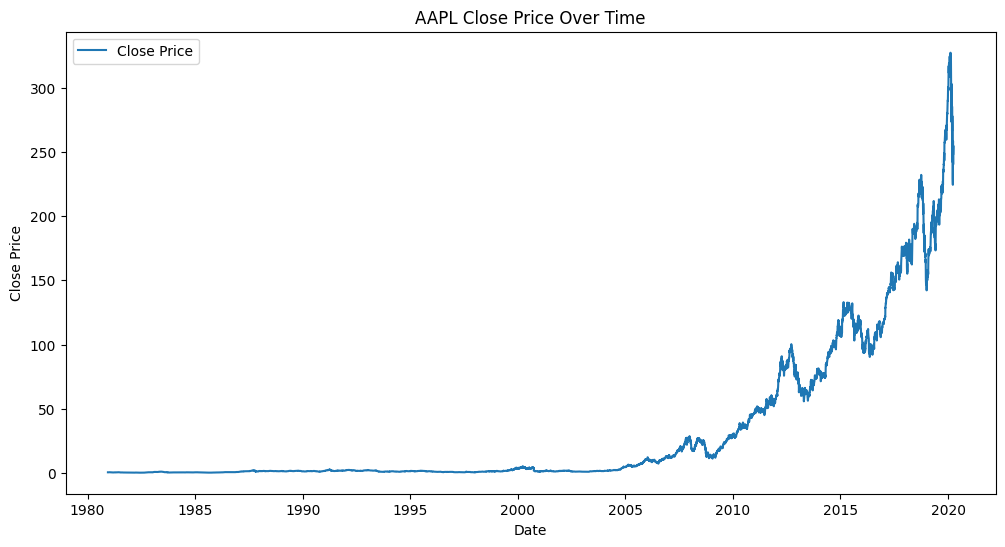

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price Over Time')
plt.legend()
plt.show()

Grafik di atas menunjukkan perkembangan harga penutupan saham AAPL dari tahun 1980 hingga 2020. Terlihat bahwa harga saham AAPL mengalami pertumbuhan yang signifikan terutama sejak tahun 2005, dengan lonjakan tajam setelah tahun 2015. Ini mencerminkan peningkatan nilai perusahaan yang konsisten, terutama dalam dekade terakhir, kemungkinan besar didorong oleh inovasi produk, ekspansi pasar, dan pertumbuhan pendapatan yang kuat. Peningkatan tajam menjelang akhir periode menunjukkan respons positif pasar terhadap kinerja perusahaan dan ekspektasi masa depan.

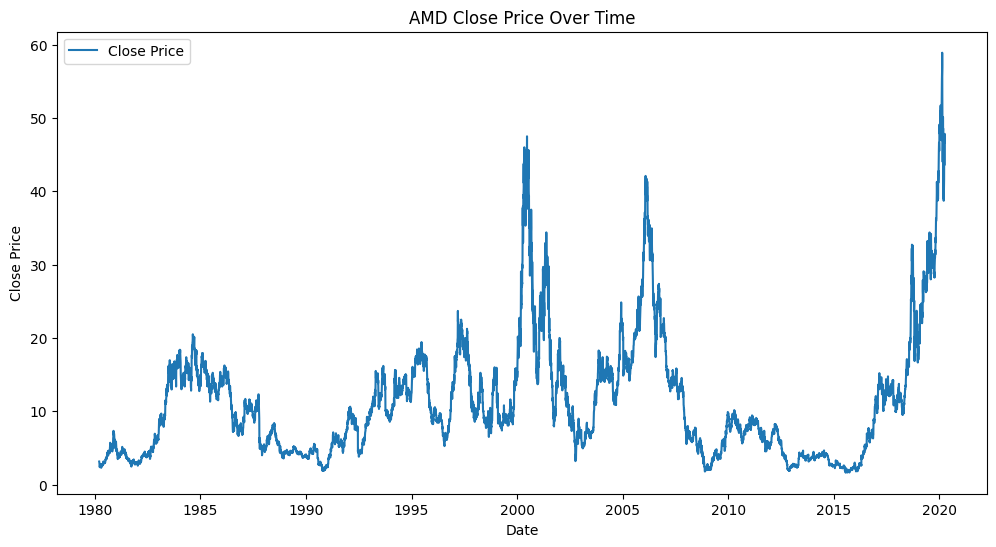

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(amd_data['Date'], amd_data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AMD Close Price Over Time')
plt.legend()
plt.show()

Grafik di atas menunjukkan perkembangan harga penutupan saham AMD dari tahun 1980 hingga 2020. Terlihat bahwa harga saham AMD mengalami beberapa periode volatilitas yang signifikan, terutama di sekitar tahun 2000 dan 2006, dengan lonjakan tajam di kedua periode tersebut. Setelah periode penurunan yang stabil, harga saham mulai meningkat kembali sejak 2016, mencapai puncaknya pada tahun 2020. Lonjakan harga saham yang signifikan menjelang akhir periode mencerminkan pertumbuhan perusahaan yang kuat, inovasi produk, dan peningkatan penerimaan pasar terhadap produk AMD dalam beberapa tahun terakhir.

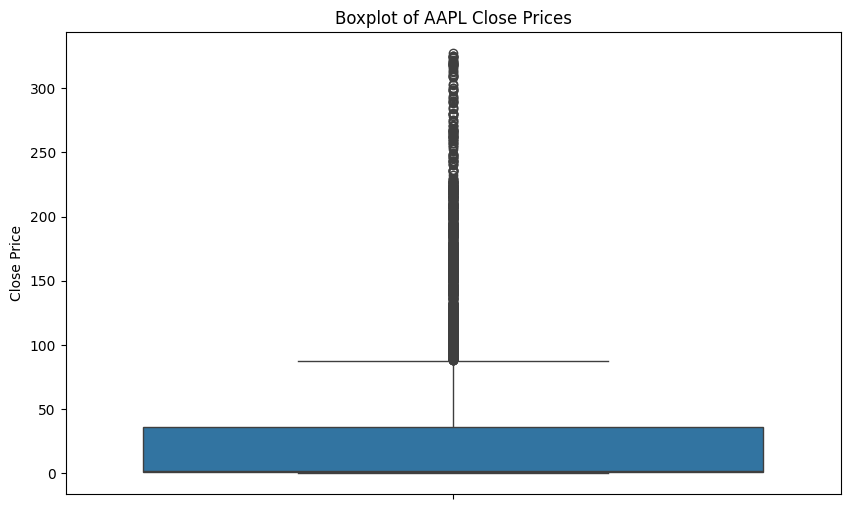

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=aapl_data['Close'])

# Menambahkan judul dan label
plt.title('Boxplot of AAPL Close Prices')
plt.ylabel('Close Price')
plt.show()

Boxplot di atas menunjukkan distribusi harga penutupan saham AAPL. Terlihat bahwa mayoritas harga penutupan berada di bawah 50, dengan banyak outlier yang berada di atas nilai tersebut, mencerminkan kenaikan tajam dalam beberapa tahun terakhir. Boxplot juga menunjukkan bahwa median harga penutupan jauh di bawah nilai maksimum, dengan distribusi yang sangat lebar, terutama pada bagian atas, yang mengindikasikan adanya lonjakan harga yang signifikan. Lonjakan ini dapat dihubungkan dengan pertumbuhan cepat perusahaan dalam periode tertentu.

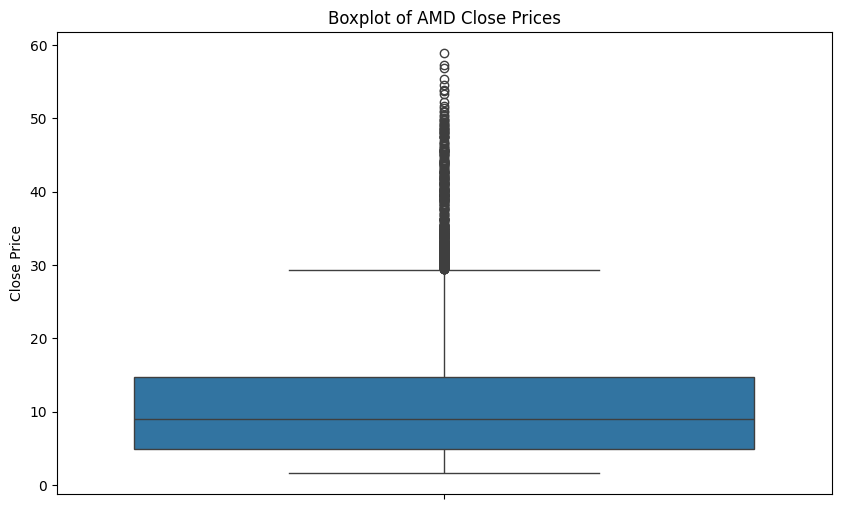

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=amd_data['Close'])

# Menambahkan judul dan label
plt.title('Boxplot of AMD Close Prices')
plt.ylabel('Close Price')
plt.show()

Boxplot di atas menunjukkan distribusi harga penutupan saham AMD. Mayoritas harga penutupan berada di sekitar nilai yang lebih rendah, dengan median sekitar 9. Terlihat juga bahwa ada banyak outlier di atas 30, mencerminkan beberapa periode lonjakan harga yang signifikan. Rentang interkuartil (IQR) berada di antara sekitar 5 hingga 15, menunjukkan bahwa sebagian besar data harga penutupan berkisar di sekitar nilai-nilai ini. Banyaknya outlier mencerminkan volatilitas yang tinggi dalam harga saham AMD selama periode yang ditinjau.

In [17]:
# Function to create time series windows
def create_windows(data, window_size, horizon):
    windows = []
    for i in range(len(data) - window_size - horizon + 1):
        input_window = data.iloc[i:i+window_size]['Close'].values
        output_window = data.iloc[i+window_size:i+window_size+horizon]['Close'].values
        windows.append((input_window, output_window))
    return windows

# Generate input and output windows for the 'Close' prices
aapl_windows = create_windows(aapl_data, window_size=5, horizon=1)
amd_windows = create_windows(amd_data, window_size=5, horizon=1)

In [18]:
# Split the data into train (80%), validation (10%), and test (10%) sets
def split_data(windows, train_ratio, val_ratio):
    n = len(windows)
    train_end = int(n * train_ratio)
    val_end = train_end + int(n * val_ratio)
    
    train_data = windows[:train_end]
    val_data = windows[train_end:val_end]
    test_data = windows[val_end:]
    
    return train_data, val_data, test_data

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

aapl_train, aapl_val, aapl_test = split_data(aapl_windows, train_ratio, val_ratio)
amd_train, amd_val, amd_test = split_data(amd_windows, train_ratio, val_ratio)

# Output the number of samples in each set
print(f"AAPL Data - Train: {len(aapl_train)}, Validation: {len(aapl_val)}, Test: {len(aapl_test)}")
print(f"AMD Data - Train: {len(amd_train)}, Validation: {len(amd_val)}, Test: {len(amd_test)}")

AAPL Data - Train: 7923, Validation: 990, Test: 991
AMD Data - Train: 8074, Validation: 1009, Test: 1010


# B. Arsitektur Baseline

In [19]:
def prepare_data(windows):
    X = np.array([window[0] for window in windows])
    y = np.array([window[1] for window in windows])
    return X, y

X_train, y_train = prepare_data(aapl_train)
X_val, y_val = prepare_data(aapl_val)
X_test, y_test = prepare_data(aapl_test)

X_train2, y_train2 = prepare_data(amd_train)
X_val2, y_val2 = prepare_data(amd_val)
X_test2, y_test2 = prepare_data(amd_test)

# AAPL

In [20]:
# Reshape data to fit LSTM input requirements [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
model_base = Sequential()
model_base.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_base.add(Dense(units=1))

model_base.summary()
# Compile the model
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])


C:\Users\helio\anaconda3\envs\satria\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model_base.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 120.4053 - mean_absolute_error: 3.3910 - val_loss: 9.0285 - val_mean_absolute_error: 2.3482
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3243 - mean_absolute_error: 0.2423 - val_loss: 14.8304 - val_mean_absolute_error: 3.1866
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3313 - mean_absolute_error: 0.2402 - val_loss: 15.6470 - val_mean_absolute_error: 3.3257
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3143 - mean_absolute_error: 0.2358 - val_loss: 13.0610 - val_mean_absolute_error: 3.0340
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2961 - mean_absolute_error: 0.2258 - val_loss: 11.4640 - val_mean_absolute_error: 2.8484
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2809 - mean_absolute_error: 0.2194 - val_loss: 11.0287 - val_mean_absolute_error: 2.7906
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2701 - mean_absolute_error: 0.2

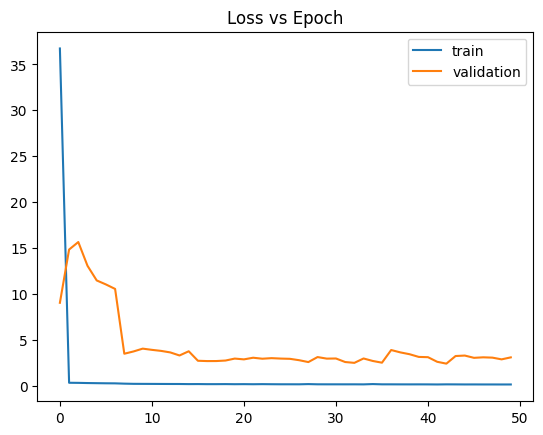

In [23]:
def plot_history(h):
    plt.plot(h.history['loss'], label="train")
    plt.plot(h.history['val_loss'], label="validation")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.show()
plot_history(history)

In [24]:
test_loss = model_base.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2624 - mean_absolute_error: 1.7108 
Test Loss: [17.752702713012695, 2.5857083797454834]


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Membuat prediksi
y_pred = model_base.predict(X_test)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Root Mean Square Error (RMSE): 4.2134
Mean Absolute Error (MAE): 2.5857
Mean Absolute Percentage Error (MAPE): 1.4054%


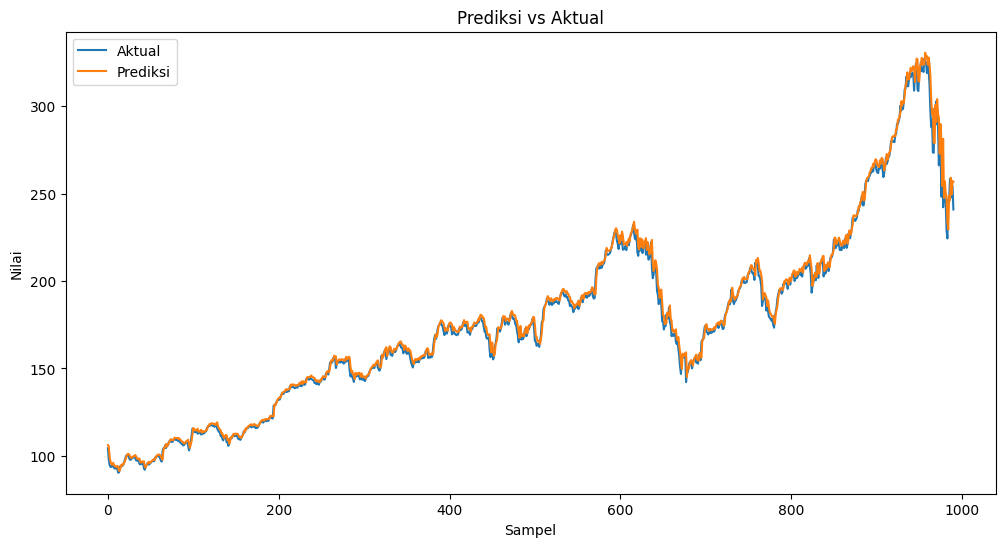

In [26]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title('Prediksi vs Aktual')
plt.xlabel('Sampel')
plt.ylabel('Nilai')
plt.legend()
plt.show()

# AMD

In [27]:
def prepare_data(windows):
    X = np.array([window[0] for window in windows])
    y = np.array([window[1] for window in windows])
    return X, y

X_train2, y_train2 = prepare_data(amd_train)
X_val2, y_val2 = prepare_data(amd_val)
X_test2, y_test2 = prepare_data(amd_test)

In [28]:
# Reshape data to fit LSTM input requirements [samples, time steps, features]
X_train2 = X_train2.reshape((X_train2.shape[0], X_train2.shape[1], 1))
X_val2 = X_val2.reshape((X_val2.shape[0], X_val2.shape[1], 1))
X_test2 = X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))

In [29]:
model_base2 = Sequential()
model_base2.add(LSTM(units=50, activation='relu', input_shape=(X_train2.shape[1], 1)))
model_base2.add(Dense(units=1))

model_base2.summary()
# Compile the model2
model_base2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])


C:\Users\helio\anaconda3\envs\satria\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model_base2.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_data=(X_val2, y_val2))

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 37.6958 - mean_absolute_error: 3.6486 - val_loss: 0.0677 - val_mean_absolute_error: 0.2062
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5255 - mean_absolute_error: 0.4742 - val_loss: 0.0355 - val_mean_absolute_error: 0.1409
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4124 - mean_absolute_error: 0.4109 - val_loss: 0.0297 - val_mean_absolute_error: 0.1277
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3752 - mean_absolute_error: 0.3886 - val_loss: 0.0263 - val_mean_absolute_error: 0.1190
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - mean_absolute_error: 0.3750 - val_loss: 0.0241 - val_mean_absolute_error: 0.1135
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3413 - mean_absolute_error: 0.3668 - val_loss: 0.0225 - val_mean_absolute_error: 0.1092
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3322 - mean_absolute_error: 0.3607 - 

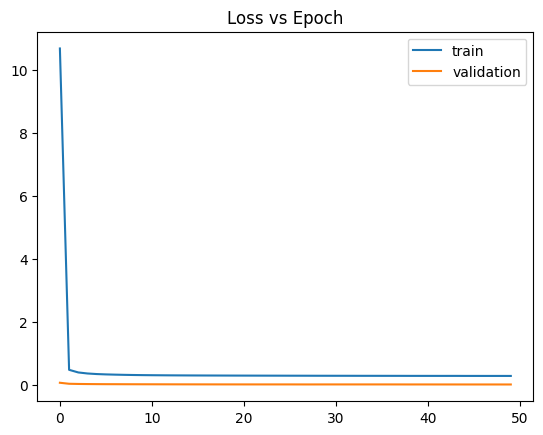

In [31]:
def plot_history(h):
    plt.plot(h.history['loss'], label="train")
    plt.plot(h.history['val_loss'], label="validation")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.show()
plot_history(history)

In [32]:
test_loss = model_base2.evaluate(X_test2, y_test2)
print(f"Test Loss: {test_loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3031 - mean_absolute_error: 0.3156 
Test Loss: [0.9721563458442688, 0.5955557227134705]


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Membuat prediksi
y_pred = model_base2.predict(X_test2)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test2, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_test2, y_pred)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test2, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Root Mean Square Error (RMSE): 0.9860
Mean Absolute Error (MAE): 0.5956
Mean Absolute Percentage Error (MAPE): 2.9280%


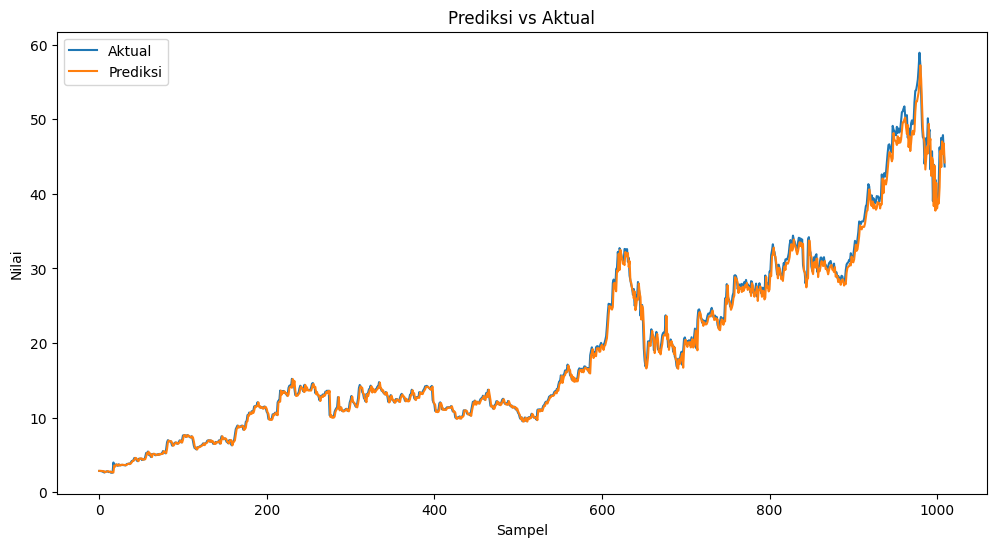

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test2, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title('Prediksi vs Aktual')
plt.xlabel('Sampel')
plt.ylabel('Nilai')
plt.legend()
plt.show()

# C. Modifikasi Arsitektur

# Manual Tuning

# AAPL

In [35]:
model = Sequential()
model.add(LSTM(units=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.summary()
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])


C:\Users\helio\anaconda3\envs\satria\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5)                   │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 252.7385 - mean_absolute_error: 7.2027 - val_loss: 9012.1143 - val_mean_absolute_error: 92.5514
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 243.3899 - mean_absolute_error: 6.8842 - val_loss: 8969.9971 - val_mean_absolute_error: 92.3234
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 240.1996 - mean_absolute_error: 6.6865 - val_loss: 8654.5947 - val_mean_absolute_error: 90.6747
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 119.5699 - mean_absolute_error: 3.7793 - val_loss: 3.5926 - val_mean_absolute_error: 1.4582
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2839 - mean_absolute_error: 0.2909 - val_loss: 4.9490 - val_mean_absolute_error: 1.7017
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1829 - mean_absolute_error: 0.1856 - val_loss: 3.7570 - val_mean_absolute_error: 1.4559
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1658 - mean_absolu

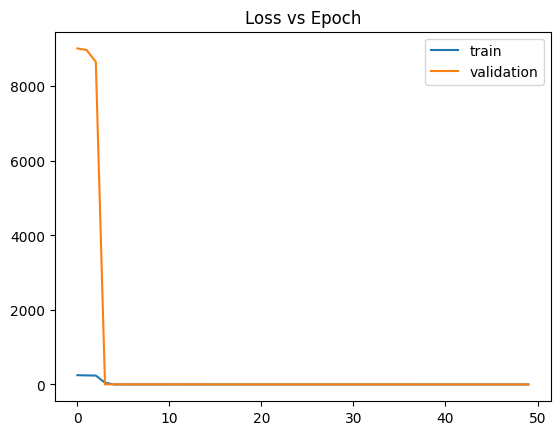

In [37]:
def plot_history(h):
    plt.plot(h.history['loss'], label="train")
    plt.plot(h.history['val_loss'], label="validation")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.show()
plot_history(history)

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Membuat prediksi
y_pred = model.predict(X_test)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Root Mean Square Error (RMSE): 3.7675
Mean Absolute Error (MAE): 2.1957
Mean Absolute Percentage Error (MAPE): 1.1734%


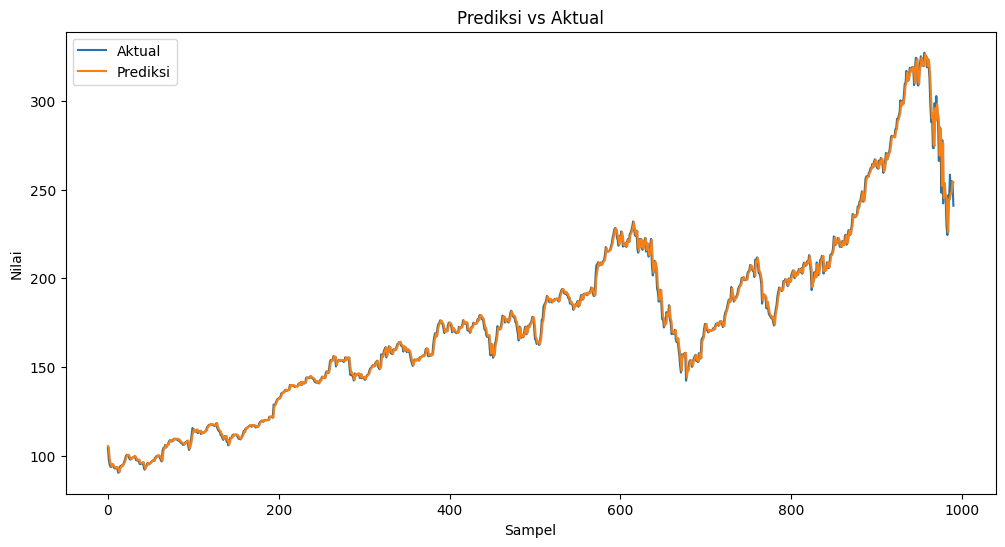

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title('Prediksi vs Aktual')
plt.xlabel('Sampel')
plt.ylabel('Nilai')
plt.legend()
plt.show()

# Hyperparemeter Tuning

# AAPL

Training with 5 LSTM units and 10 epochs


C:\Users\helio\anaconda3\envs\satria\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Loss: 4.8979, Test Loss: 44.6025
--------------------
Training with 5 LSTM units and 20 epochs
Validation Loss: 2.5445, Test Loss: 16.2636
--------------------
Training with 5 LSTM units and 30 epochs
Validation Loss: 8.0811, Test Loss: 524.0665
--------------------
Training with 5 LSTM units and 40 epochs
Validation Loss: 3.5180, Test Loss: 26.6889
--------------------
Training with 5 LSTM units and 50 epochs
Validation Loss: 3.0997, Test Loss: 1046.6080
--------------------
Training with 10 LSTM units and 10 epochs
Validation Loss: 3.3417, Test Loss: 16.7841
--------------------
Training with 10 LSTM units and 20 epochs
Validation Loss: 3.6800, Test Loss: 136.8740
--------------------
Training with 10 LSTM units and 30 epochs
Validation Loss: 3.9147, Test Loss: 370.1844
--------------------
Training with 10 LSTM units and 40 epochs
Validation Loss: 2.5583, Test Loss: 15.2491
--------------------
Training with 10 LSTM units and 50 epochs
Validation Loss: 3.2591, Test Loss: 

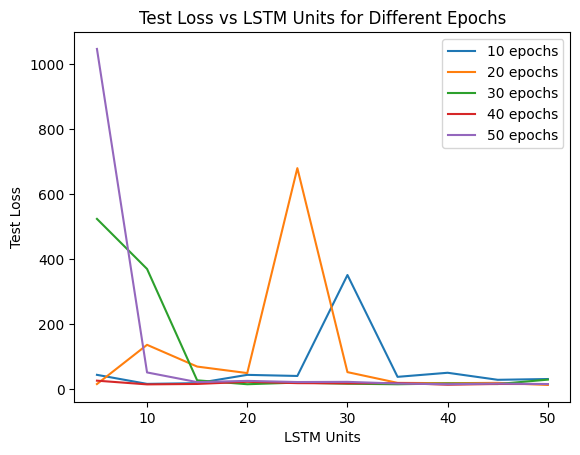

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9493 - mean_absolute_error: 1.4443 
Best Model - Test Loss: 13.6031, Test MAE: 2.2427
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE: 3.6882
MAPE: 1.2043%


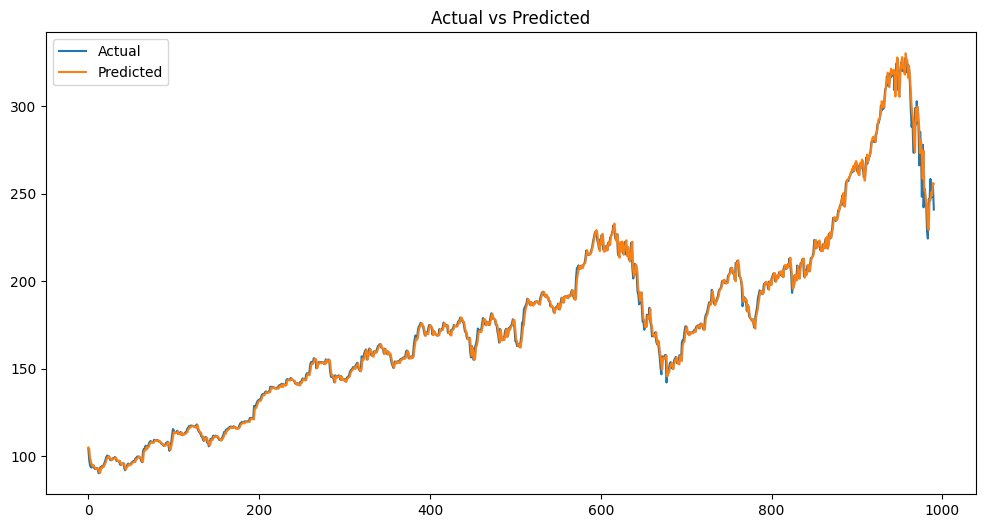

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Daftar jumlah unit LSTM dan epoch yang akan dicoba
lstm_units = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
epochs_list = [10, 20, 30, 40, 50]

best_model = None
best_loss = float('inf')
best_units = 0
best_epochs = 0

results = []

for units in lstm_units:
    for epochs in epochs_list:
        print(f"Training with {units} LSTM units and {epochs} epochs")
        
        model = Sequential([
            LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], 1)),
            Dense(units=1)
        ])
        
        model.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='mean_squared_error',
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])
        
        history = model.fit(X_train, y_train, 
                            epochs=epochs, 
                            batch_size=32, 
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        val_loss = history.history['val_loss'][-1]
        test_loss = model.evaluate(X_test, y_test, verbose=0)[0]
        
        results.append((units, epochs, val_loss, test_loss))
        
        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model
            best_units = units
            best_epochs = epochs
        
        print(f"Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}")
        print("--------------------")

# Print best results
print(f"Best model: {best_units} LSTM units, {best_epochs} epochs")
print(f"Best test loss: {best_loss:.4f}")

# Plot results
results = np.array(results)
for epochs in epochs_list:
    plt.plot(results[results[:, 1] == epochs][:, 0], 
             results[results[:, 1] == epochs][:, 3], 
             label=f'{epochs} epochs')

plt.xlabel('LSTM Units')
plt.ylabel('Test Loss')
plt.legend()
plt.title('Test Loss vs LSTM Units for Different Epochs')
plt.show()

# Evaluate best model
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Best Model - Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Predictions with best model
y_pred = best_model.predict(X_test)

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Manual Tuning

# AMD

In [41]:
model2 = Sequential()
model2.add(LSTM(units=5, activation='relu', input_shape=(X_train2.shape[1], 1)))
model2.add(Dense(units=1))

model2.summary()
# Compile the model2
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 5)                   │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model2.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_data=(X_val2, y_val2))
test_loss = model2.evaluate(X_test2, y_test2)
print(f"Test Loss: {test_loss}")

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 150.5585 - mean_absolute_error: 9.4913 - val_loss: 0.1222 - val_mean_absolute_error: 0.3151
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3947 - mean_absolute_error: 0.3936 - val_loss: 0.0568 - val_mean_absolute_error: 0.1929
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3803 - mean_absolute_error: 0.3813 - val_loss: 0.0454 - val_mean_absolute_error: 0.1651
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3749 - mean_absolute_error: 0.3790 - val_loss: 0.0399 - val_mean_absolute_error: 0.1509
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3698 - mean_absolute_error: 0.3768 - val_loss: 0.0365 - val_mean_absolute_error: 0.1420
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3640 - mean_absolute_error: 0.3740 - val_loss: 0.0341 - val_mean_absolute_error: 0.1356
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3573 - mean_absolute_error: 0.3705 -

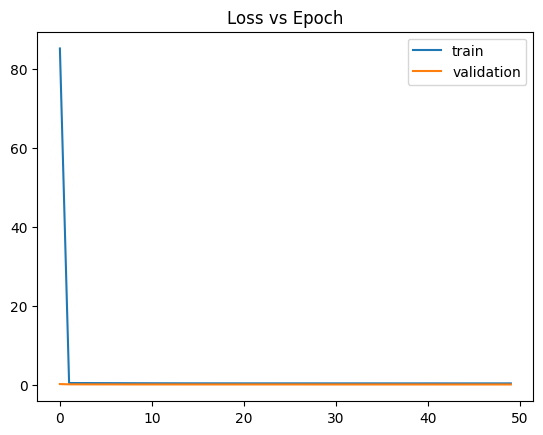

In [43]:
def plot_history(h):
    plt.plot(h.history['loss'], label="train")
    plt.plot(h.history['val_loss'], label="validation")
    plt.title("Loss vs Epoch")
    plt.legend()
    plt.show()
plot_history(history)

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Membuat prediksi
y_pred = model2.predict(X_test2)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test2, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_test2, y_pred)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test2, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Root Mean Square Error (RMSE): 0.9194
Mean Absolute Error (MAE): 0.5532
Mean Absolute Percentage Error (MAPE): 2.8133%


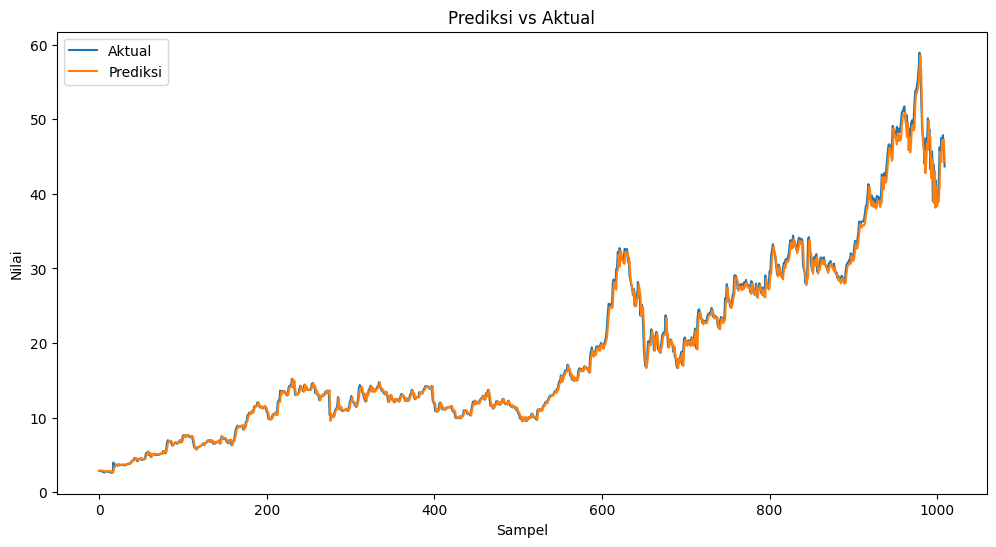

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test2, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title('Prediksi vs Aktual')
plt.xlabel('Sampel')
plt.ylabel('Nilai')
plt.legend()
plt.show()

# Hyperparameter Tuning

# AMD

Training with 5 LSTM units and 10 epochs


C:\Users\helio\anaconda3\envs\satria\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Loss: 0.0322, Test Loss: 0.9810
--------------------
Training with 5 LSTM units and 20 epochs
Validation Loss: 3.3207, Test Loss: 352.5683
--------------------
Training with 5 LSTM units and 30 epochs
Validation Loss: 0.0208, Test Loss: 0.8779
--------------------
Training with 5 LSTM units and 40 epochs
Validation Loss: 0.0338, Test Loss: 1.0951
--------------------
Training with 5 LSTM units and 50 epochs
Validation Loss: 0.0143, Test Loss: 0.8403
--------------------
Training with 10 LSTM units and 10 epochs
Validation Loss: 2.4884, Test Loss: 422.7625
--------------------
Training with 10 LSTM units and 20 epochs
Validation Loss: 0.0222, Test Loss: 1.0159
--------------------
Training with 10 LSTM units and 30 epochs
Validation Loss: 0.0169, Test Loss: 0.8457
--------------------
Training with 10 LSTM units and 40 epochs
Validation Loss: 0.0204, Test Loss: 0.9074
--------------------
Training with 10 LSTM units and 50 epochs
Validation Loss: 0.0176, Test Loss: 0.9647
---

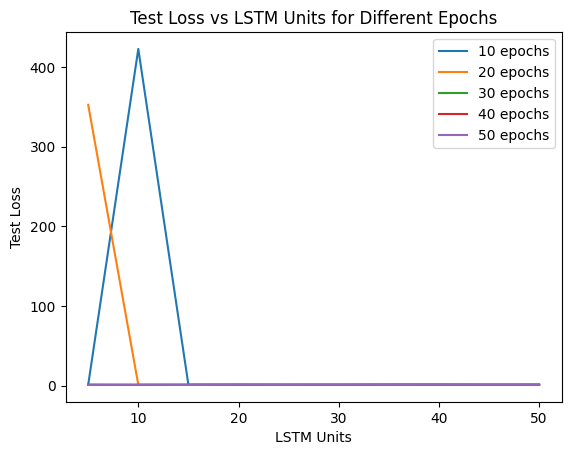

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2702 - mean_absolute_error: 0.3008 
Best model2 - Test Loss: 0.7896, Test MAE: 0.5281
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE: 0.8886
MAPE: 2.7345%


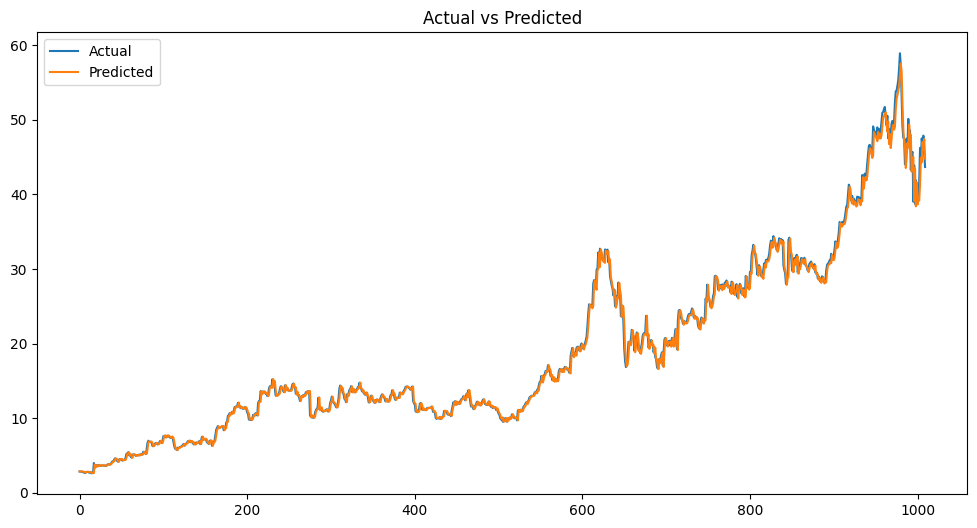

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Daftar jumlah unit LSTM dan epoch yang akan dicoba
lstm_units = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
epochs_list = [10, 20, 30, 40, 50]

best_model = None
best_loss = float('inf')
best_units = 0
best_epochs = 0

results = []

for units in lstm_units:
    for epochs in epochs_list:
        print(f"Training with {units} LSTM units and {epochs} epochs")
        
        model2 = Sequential([
            LSTM(units=units, activation='relu', input_shape=(X_train2.shape[1], 1)),
            Dense(units=1)
        ])
        
        model2.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='mean_squared_error',
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])
        
        history = model2.fit(X_train2, y_train2, 
                            epochs=epochs, 
                            batch_size=32, 
                            validation_data=(X_val2, y_val2),
                            verbose=0)
        
        val_loss = history.history['val_loss'][-1]
        test_loss = model2.evaluate(X_test2, y_test2, verbose=0)[0]
        
        results.append((units, epochs, val_loss, test_loss))
        
        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model2
            best_units = units
            best_epochs = epochs
        
        print(f"Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}")
        print("--------------------")

# Print best results
print(f"Best model2: {best_units} LSTM units, {best_epochs} epochs")
print(f"Best test loss: {best_loss:.4f}")

# Plot results
results = np.array(results)
for epochs in epochs_list:
    plt.plot(results[results[:, 1] == epochs][:, 0], 
             results[results[:, 1] == epochs][:, 3], 
             label=f'{epochs} epochs')

plt.xlabel('LSTM Units')
plt.ylabel('Test Loss')
plt.legend()
plt.title('Test Loss vs LSTM Units for Different Epochs')
plt.show()

# Evaluate best model2
test_loss, test_mae = best_model.evaluate(X_test2, y_test2)
print(f"Best model2 - Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Predictions with best model2
y_pred = best_model.predict(X_test2)

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((y_test2 - y_pred)**2))
mape = np.mean(np.abs((y_test2 - y_pred) / y_test2)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test2, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# D. Evaluasi

##### Hasil untuk baseline model pada AMD dan AAPL

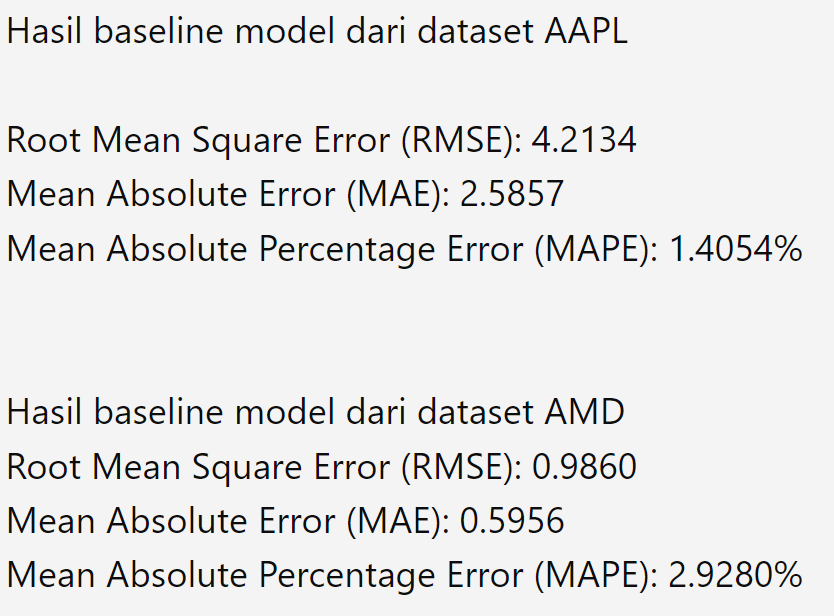

Hasil baseline model untuk dataset AAPL menunjukkan Root Mean Square Error (RMSE) sebesar 4.2134, Mean Absolute Error (MAE) sebesar 2.5857, dan Mean Absolute Percentage Error (MAPE) sebesar 1.4054%. Sementara itu, hasil untuk dataset AMD menunjukkan RMSE sebesar 0.9860, MAE sebesar 0.5956, dan MAPE sebesar 2.9280%. Analisis ini menunjukkan bahwa model baseline memiliki performa yang lebih baik dalam memprediksi harga saham AMD dibandingkan dengan AAPL, dilihat dari nilai error yang lebih rendah untuk RMSE dan MAE. Namun, MAPE menunjukkan bahwa persentase kesalahan relatif lebih tinggi pada AMD dibandingkan AAPL. Kesimpulannya, meskipun model baseline lebih akurat dalam hal kesalahan absolut untuk AMD, kesalahan relatif terhadap nilai aktual lebih besar dibandingkan dengan AAPL, yang berarti prediksi model untuk AMD lebih bervariasi dalam proporsi terhadap nilai aktualnya dibandingkan AAPL. Ini menunjukkan perlunya peningkatan model untuk mengurangi kesalahan prediksi secara keseluruhan, terutama pada dataset dengan variasi harga yang lebih kecil seperti AMD.

##### Hasil untuk modifikasi manual model pada AMD dan AAPL

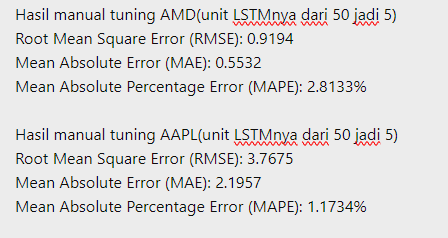

Setelah melakukan tuning manual dengan mengurangi unit LSTM dari 50 menjadi 5, hasil menunjukkan perubahan pada nilai error untuk dataset AMD dan AAPL. Untuk dataset AMD, tuning manual berhasil menurunkan error, dengan RMSE turun dari 0.9860 menjadi 0.9194, MAE turun dari 0.5956 menjadi 0.5532, dan MAPE turun dari 2.9280% menjadi 2.8133%. Ini menunjukkan bahwa penurunan jumlah unit LSTM membantu meningkatkan akurasi prediksi untuk dataset AMD. Untuk dataset AAPL, tuning manual juga berhasil menurunkan error, dengan RMSE turun dari 4.2134 menjadi 3.7675, MAE turun dari 2.5857 menjadi 2.1957, dan MAPE turun dari 1.4054% menjadi 1.1734%. Ini menunjukkan bahwa mengurangi jumlah unit LSTM membantu meningkatkan akurasi prediksi untuk kedua dataset, meskipun peningkatan performa lebih signifikan terlihat pada dataset AAPL. Kesimpulannya, tuning manual memberikan hasil yang lebih baik untuk kedua dataset, dengan penurunan error yang signifikan pada AAPL dan peningkatan moderat pada AMD.

# Hasil tuning Hyperparameter dari dataset AMD dan AAPL

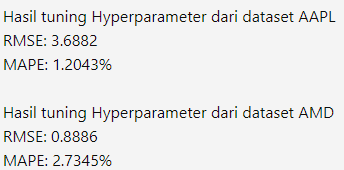

Setelah melakukan hyperparameter tuning menggunakan variabel `lstm_units` dan `epochs_list`, hasilnya menunjukkan peningkatan performa model baik untuk dataset AAPL maupun AMD. Untuk dataset AAPL, tuning menghasilkan penurunan RMSE dari baseline 4.2134 menjadi 3.6882, dan penurunan MAPE dari 1.4054% menjadi 1.2043%. Ini menunjukkan bahwa model yang dituning lebih akurat dalam memprediksi harga saham AAPL dibandingkan model baseline. Demikian pula, untuk dataset AMD, tuning menghasilkan penurunan RMSE dari baseline 0.9860 menjadi 0.8886, dan penurunan MAPE dari 2.9280% menjadi 2.7345%. Penurunan nilai RMSE dan MAPE untuk kedua dataset menunjukkan bahwa hyperparameter tuning berhasil mengoptimalkan model, menghasilkan prediksi yang lebih akurat dan konsisten. Kesimpulannya, proses tuning hyperparameter efektif dalam meningkatkan performa model, membuatnya lebih andal untuk analisis prediksi harga saham baik untuk AAPL maupun AMD.

# Kesimpulan

Setelah membandingkan hasil antara model baseline, tuning manual, dan hyperparameter tuning, kita dapat melihat bahwa ada peningkatan yang signifikan dalam performa model untuk kedua dataset, AAPL dan AMD. Untuk dataset AAPL, tuning manual dengan mengurangi unit LSTM dari 50 menjadi 5 berhasil menurunkan RMSE dari 4.2134 menjadi 3.7675 dan MAPE dari 1.4054% menjadi 1.1734%. Hyperparameter tuning lebih lanjut mengurangi RMSE menjadi 3.6882 dan MAPE menjadi 1.2043%, menunjukkan peningkatan yang lebih kecil namun tetap signifikan dibandingkan baseline. Untuk dataset AMD, tuning manual juga menunjukkan peningkatan dengan menurunkan RMSE dari 0.9860 menjadi 0.9194 dan MAPE dari 2.9280% menjadi 2.8133%. Hyperparameter tuning memberikan hasil terbaik dengan RMSE turun menjadi 0.8886 dan MAPE menjadi 2.7345%, menunjukkan prediksi yang lebih akurat dan konsisten. Kesimpulannya, baik tuning manual maupun hyperparameter tuning efektif dalam meningkatkan performa model, dengan hyperparameter tuning memberikan hasil terbaik untuk kedua dataset.

# E. Video

https://drive.google.com/file/d/1JDbQDm96AVr7ORxX9plxVPsAh8sIywGD/view?usp=sharing